In [8]:
import sys
sys.version
sys.version_info

/opt/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin


In [2]:
import pandas as pd  
import numpy as np
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import LinearConstraint
from scipy.optimize import Bounds

In [3]:
# read in the data

inpath  = 'C:\\Users\\Lenovo\\Desktop\\MoF\\Programming_Assignment\\'
outpath = 'C:\\Users\\Lenovo\\Desktop\\MoF\\Programming_Assignment\\code_R\\ReturnsPortfolios\\'

infile  = 'ReturnsPortfolios.csv'

print(inpath + infile)

indata = pd.read_csv(r'C:\Users\Lenovo\Desktop\MoF\Programming_Assignment\ReturnsPortfolios.csv')


C:\Users\Lenovo\Desktop\MoF\Programming_Assignment\ReturnsPortfolios.csv


In [4]:
indata.head()

,Date,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


In [5]:
RiskyAsset     = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
RiskFreeAsset  = "Treasury.Bill.90D"

In [6]:
# print out first 3 rows and all columns of risky assets
indata.loc[0:5,RiskyAsset]

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,-0.040626,0.042834,0.049747,0.044235
1,0.059266,0.041869,0.070676,0.013917
2,0.027948,-0.033456,0.078041,-0.019930
3,0.019014,0.009184,0.012751,-0.012511
4,-0.018278,0.008603,-0.038039,-0.015848
5,-0.009707,0.046549,-0.033873,0.032302


## <span style="color:blue">Part 1: Risky Assets Analysis</span>

### **1. Mean**

In [7]:
me = indata[RiskyAsset].mean()
me

MSCI EUROPE          0.007798
MSCI USA             0.009155
MSCI PACIFIC         0.003608
Treasury.Bond.10Y    0.005627
dtype: float64

### **2. Median**

In [8]:
med = indata[RiskyAsset].median()
med

MSCI EUROPE          0.010439
MSCI USA             0.012908
MSCI PACIFIC         0.001994
Treasury.Bond.10Y    0.005221
dtype: float64

### **3. Standard Deviation**

In [9]:
sd = indata[RiskyAsset].std()
sd

MSCI EUROPE          0.049996
MSCI USA             0.041358
MSCI PACIFIC         0.055957
Treasury.Bond.10Y    0.019887
dtype: float64

### **4. Skew**

In [10]:
sk = indata[RiskyAsset].skew()
sk

MSCI EUROPE         -0.487418
MSCI USA            -0.565864
MSCI PACIFIC         0.003849
Treasury.Bond.10Y   -0.009944
dtype: float64

### **5. Kurtosis**

In [11]:
kurt = indata[RiskyAsset].kurtosis()
kurt

MSCI EUROPE          1.274753
MSCI USA             1.218349
MSCI PACIFIC         0.874957
Treasury.Bond.10Y    0.839616
dtype: float64

### **6. Risk-Return Ratio**

In [12]:
ratio = me/sd
print(ratio)

MSCI EUROPE          0.155978
MSCI USA             0.221373
MSCI PACIFIC         0.064470
Treasury.Bond.10Y    0.282970
dtype: float64


### ******1 - 6 in One Table**

In [13]:
analysis = pd.concat([me,med,sd,sk,kurt,ratio], axis = 1)
analysis.columns = ['Mean','Median','Standard Deviation','Skew','Kurtosis','Return-Risk Ratio']
analysis.head()

,Mean,Median,Standard Deviation,Skew,Kurtosis,Return-Risk Ratio
MSCI EUROPE,0.007798,0.010439,0.049996,-0.487418,1.274753,0.155978
MSCI USA,0.009155,0.012908,0.041358,-0.565864,1.218349,0.221373
MSCI PACIFIC,0.003608,0.001994,0.055957,0.003849,0.874957,0.064470
Treasury.Bond.10Y,0.005627,0.005221,0.019887,-0.009944,0.839616,0.282970


### **7. Risk-Return Graph**

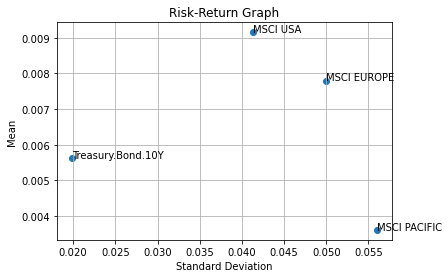

In [14]:
xs = analysis['Standard Deviation']
ys = analysis['Mean']

plt.scatter(xs,ys)

plt.grid()

plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.title('Risk-Return Graph')

plt.text(analysis.iat[0,2],analysis.iat[0,0],'MSCI EUROPE')
plt.text(analysis.iat[1,2],analysis.iat[1,0],'MSCI USA')
plt.text(analysis.iat[2,2],analysis.iat[2,0],'MSCI PACIFIC')
plt.text(analysis.iat[3,2],analysis.iat[3,0],'Treasury.Bond.10Y')

plt.show()

### **8. Analysis**

MSCI USA has the highest mean return and the highest median return, and compared to the other 3 risky assets, it has the second lowest risk. Treasury.Bond.10Y has the lowest risk, and its mean return is not that low. The return-risk ratio of the two assets are also high among the four assets. So in terms of <b>risk</b> and <b>return</b>, MSCI USA and Treasury.Bond.10Y are two good choices of investment.<br><br>The distributions of the four assets are <b>moderately skewed</b>, with absolute value between 0.5 and 1. In particular, MSCI EUROPE, MSCI USA, and Treasury.Bond.10Y are negatively skewed, while MSCI PACIFIC is positively skewed.<br><br>Neither of the four assets has a <b>kurtosis</b> greater than 1 or less than -1, so theirs distributions are neither too peaked or too flat/

## <span style="color:blue">Part 2:  Distributions </span>
Plot the distributions for each asset class

Compare the distribution

### **MSCI AC EUROPE**

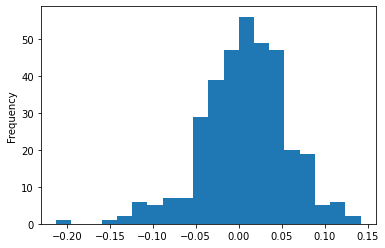

In [15]:
indata["MSCI EUROPE"].plot.hist(stacked=True, bins=20)

### **MSCI PACIFIC**

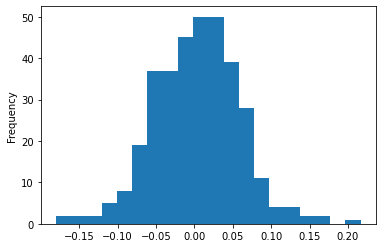

In [16]:
indata["MSCI PACIFIC"].plot.hist(stacked=True, bins=20)

### **MSCI USA**

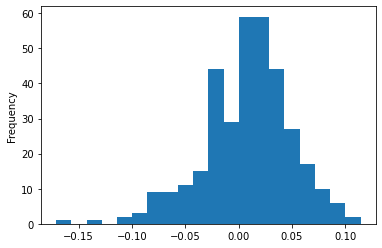

In [17]:
indata["MSCI USA"].plot.hist(stacked=True, bins=20)

### **Treasury.Bond.10Y**

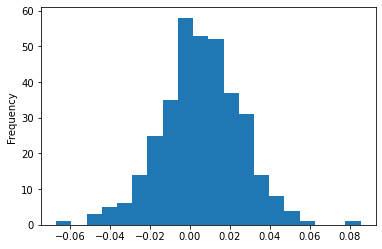

In [18]:
indata["Treasury.Bond.10Y"].plot.hist(stacked=True, bins=20)

All of them display a normal distribution who peak at around 0. However, MSCI AC EUROPE and MSCI USA have a long left tail, MSCI PACIFIC has a long right tail, while the Treasury.Bond.10Y is relatively symmetric.

## <span style="color:blue"> Part 3: Covariance and Correlation Matrices  </span>

 1.	Calculate the covariance matrix 
 2. Calculate the correlation matrix
 3.	Verify the covariance matrix is non-singular
 4.	Verify the covariance matrix is symmetric and positive definite


### **1. Covariance Matrix**

In [19]:
cov = indata[RiskyAsset].cov()
cov

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,0.002500,0.001616,0.001813,-0.000097
MSCI USA,0.001616,0.001710,0.001247,-0.000039
MSCI PACIFIC,0.001813,0.001247,0.003131,-0.000035
Treasury.Bond.10Y,-0.000097,-0.000039,-0.000035,0.000395


### **2. Correlation Matrix**

In [20]:
corr = indata[RiskyAsset].corr()
corr

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,1.000000,0.781742,0.647950,-0.097888
MSCI USA,0.781742,1.000000,0.538701,-0.047390
MSCI PACIFIC,0.647950,0.538701,1.000000,-0.031418
Treasury.Bond.10Y,-0.097888,-0.047390,-0.031418,1.000000


### **3. Verify the covariance matrix is non-singular**

In [21]:
# define a function to check if the determinant of a matrix is zero
# if determinant = 0, return false, i.e. the matrix is singular
# otherwise the matrix is non-singular

def is_non_singular(x):
    if np.linalg.det(x) == 0:
        print('The matrix is singular.')
    else:
        print('The matrix is non-singular.')

# call the function
is_non_singular(cov)

The matrix is non-singular.


### **4. Verify the covariance matrix is symmetric and positive definite**

In [22]:
# if the transpose of a matrix is equal to the matrix, then the matrix is symmetric
# so we define a function to check that

def is_symmetric(x):
    if np.allclose(x,x.T):
        print('The matrix is symmetric.')
    else:
        print('The matrix is not symmetric.')

# call the function
is_symmetric(corr)

The matrix is symmetric.


In [23]:
# for a symmetric matrix, if all of its eigenvalues are positive, then the symmetric matrix is positive definite
# we have already checked that the covariance matrix is symmetric
# therefore, we write a function to check if the eigenvalues of the correlation matrix are all positive

def is_pos_def(x):
    if np.all(np.linalg.eigvals(x) > 0):
        print('The matrix is positive definite.')
    else:
        print('The matrix is not positive definite.')

# call the function
is_pos_def(corr)

The matrix is positive definite.


## <span style="color:blue">Part 4: Calculate the weights, returns and risks for the following portfolios     </span>

In [24]:
assets = ["Date","MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
assets = indata[assets]
returns = assets.set_index('Date')
returns.head()

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
Date,,,,
1/29/1988,-0.040626,0.042834,0.049747,0.044235
2/29/1988,0.059266,0.041869,0.070676,0.013917
3/31/1988,0.027948,-0.033456,0.078041,-0.019930
4/29/1988,0.019014,0.009184,0.012751,-0.012511
5/31/1988,-0.018278,0.008603,-0.038039,-0.015848


 ## **1.	Minimum Variance Portfolio**

In [25]:
# monthly mean return of the assets
mean_returns = returns.mean()

# covariance of the assets
cov = returns.cov()

In [26]:
# function that calculate annualized return, annualized standard deviation, and annualized sharpe ratio
# arguments provided are weights, mean monthly return of each assets, the covariance matrix, and the risk free interest rate
def calc_portfolio_perf(weights, mean_returns, cov, RiskfreeRate):
    portfolio_return = np.sum(mean_returns * weights) * 12
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(12)
    sharpe_ratio = (portfolio_return - RiskfreeRate) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

In [27]:
# function that calculates the risk
def calc_std(w, mean_returns, cov):
    std = np.sqrt(np.dot(w.T, np.dot(cov, w))) * np.sqrt(12)
    return std

# function that calculates variance
def calc_var(w, mean_returns, cov):
    return calc_std(w, mean_returns, cov) * calc_std(w, mean_returns, cov)

In [28]:
# function that calculates the minimum variance
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    const = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_std, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=const)
    return result

MVP = min_variance(mean_returns, cov)

# weights of the MVP
MVP_weights = MVP.x

# MVP
MVP_perf = np.asmatrix(calc_portfolio_perf(MVP_weights, mean_returns, cov, 0))
MVP_perf = pd.DataFrame(MVP_perf, columns = ['Return', 'StdDev', 'Sharpe'])

# weights of the MVP as dataframe
MVP_weights = MVP.x
MVP_weights = np.asmatrix(MVP.x)
MVP_weights = pd.DataFrame(MVP_weights, columns = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"])

### <span style = 'color: red'> <u>MVP</u>

In [29]:
MVP_Performance = pd.concat([MVP_perf,MVP_weights],axis=1)
MVP_Performance

,Return,StdDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,0.073677,0.060352,1.220777,0.050737,0.129,0.026178,0.794085


 ## **2. Minimum Variance Portfolio with expected return of 9%**

In [30]:
exp_ret = 0.09

In [31]:
# function that calculates the minimum variance
def min_variance_2(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    const = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type' : 'ineq' , 'fun' : lambda x2: np.dot(x2, mean_returns * 12) - exp_ret})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_std, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=const)
    return result

MVP_2 = min_variance_2(mean_returns, cov)

# weights of the MVP
MVP_weights_2 = MVP_2.x

# MVP
MVP_perf_2 = np.asmatrix(calc_portfolio_perf(MVP_weights_2, mean_returns, cov, 0))
MVP_perf_2 = pd.DataFrame(MVP_perf_2, columns = ['Return', 'StdDev', 'Sharpe'])

# weights of the MVP as dataframe
MVP_weights_2 = MVP_2.x
MVP_weights_2 = np.asmatrix(MVP_2.x)
MVP_weights_2 = pd.DataFrame(MVP_weights_2, columns = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"])

### <span style = 'color: red'> <u>MVP with expected return of 9%</u>

In [32]:
MVP2_Performance = pd.concat([MVP_perf_2,MVP_weights_2],axis=1)
MVP2_Performance

,Return,StdDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,0.09,0.081207,1.108284,1.110223e-16,0.530781,0.0,0.469219


 ## **3. Efficient Frontier (calculate the weights, returns and risk of at least 7 portfolios) <br>  <br>4. Plot the portfolios and asset classes on a graph <br><br>5. Plot an equal weighted portfolio on the graph**

In [33]:
# Function that creates multiple randomly weighted portfolios,  
# which are then passed to the previous function to calculate the required values
# Required values are annualized return, annualized standard deviation, annualized sharpe ratio, 
# and weights of the portfolio that generate those value
def simulate_random_portfolios(num_portfolios, mean_returns, cov, RiskfreeRate):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)     # make sure that the weights sum to 1
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, RiskfreeRate)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['Return','StDev','Sharpe'] + [ticker for ticker in returns.columns])
    # + [ticker for ticker in tickers]    
    return results_df

In [34]:
# say we randomly generate 5000 portfolios
num_portfolios = 10000

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, 0)
results_frame.head()

,Return,StDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,0.084694,0.096882,0.874190,0.030108,0.483455,0.168630,0.317807
1,0.079138,0.124855,0.633842,0.188551,0.340811,0.318968,0.151670
2,0.088202,0.128052,0.688799,0.595136,0.154484,0.056538,0.193841
3,0.086323,0.139087,0.620642,0.567430,0.178766,0.146704,0.107100
4,0.074293,0.106860,0.695232,0.272044,0.146165,0.268618,0.313172


### <span style = 'color: magenta'> **<u>Equally Weighted Portfolio</u>**

In [35]:
eq_weights = np.array([0.25, 0.25, 0.25, 0.25])
eq_weights_port = calc_portfolio_perf(eq_weights, mean_returns, cov, 0)
eq_weights_ret = eq_weights_port[0]
eq_weights_vol = eq_weights_port[1]

data = [eq_weights_port]
eq_weights_perf = pd.DataFrame(data, columns =['Return','StdDev','Sharpe'])

data2 = [(0.25, 0.25, 0.25, 0.25)]
eq_weights_df = pd.DataFrame(data2, columns = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"])
pd.concat([eq_weights_perf,eq_weights_df],axis=1)

,Return,StdDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,0.078566,0.112069,0.701051,0.25,0.25,0.25,0.25


### <span style = 'color: red'> **<u>Efficeint Frontier</u>**

In [36]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['StDev'].idxmin()]

# weight, return, and volatility of Minimum Variance Portfolio
w_min = pd.DataFrame(MVP_weights).to_numpy()
w_min = w_min[0]
w = w_min
w_min_ret = MVP_perf['Return'][0]
w_min_vol = np.array(min_vol_port)[1]

# weight, return, and volatility of Maximum Sharpe Ratio Portfolio
w_sharpe = np.array(max_sharpe_port)[3:7]
w_sharpe_ret = np.array(max_sharpe_port)[0]
w_sharpe_vol = np.array(max_sharpe_port)[1]

# since we already calculated the highest return for the lowest level of risk, 
# we can start there and move up the return axis bit by bit - 
# let's say 100 points. Then, we optimize (minimize) for the level of risk
num_ports = 300
gap = (np.amax(mean_returns* 12)  - w_min_ret) / num_ports


all_weights = np.zeros((num_ports, len(mean_returns)))
all_weights[0],all_weights[1] = w_min,w_sharpe
ret_arr = np.zeros(num_ports)
ret_arr[0],ret_arr[1] = w_min_ret, w_sharpe_ret
vol_arr = np.zeros(num_ports)
vol_arr[0],vol_arr[1] = w_min_vol, w_sharpe_vol


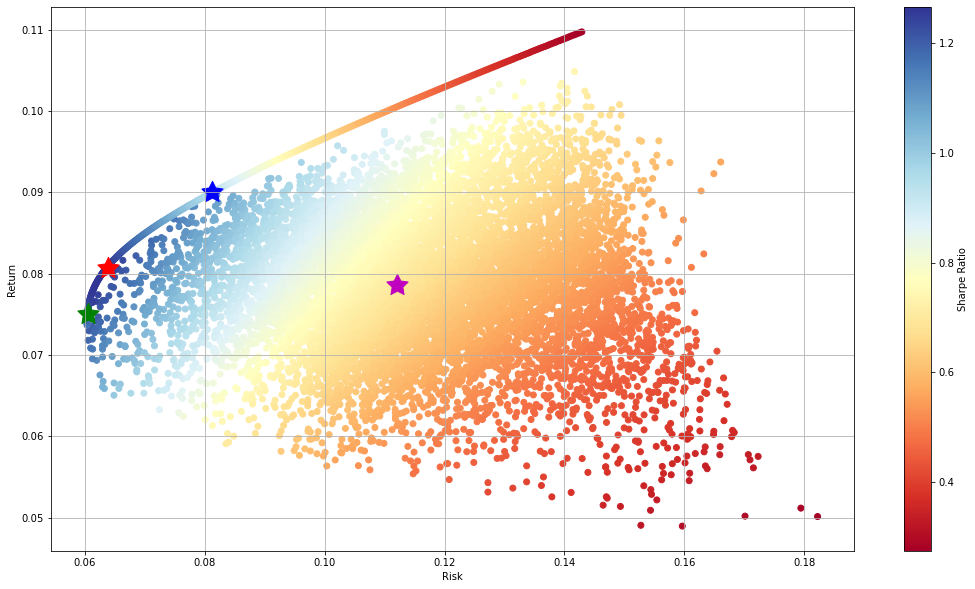

In [37]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['StDev'].idxmin()]


#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(18,10))
plt.scatter(results_frame.StDev,results_frame.Return,c=results_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.grid()
plt.colorbar(label = 'Sharpe Ratio')
plt.rcParams['axes.facecolor'] = 'white'


# Volatility
def vol(w,cov):
    return np.sqrt(np.dot(w,np.dot(w,cov)))* np.sqrt(12)

for i in range(num_ports):
    port_ret = mean_returns.dot(w) * 12 + i * gap
    double_constraint = LinearConstraint([np.ones(returns.shape[1]),mean_returns*12],[1,port_ret],[1,port_ret])
    
    #Create x0: initial guesses for weights.
    x0 = w_min
    #Define a function for portfolio volatility.
    fun = lambda w: np.sqrt(np.dot(w,np.dot(w,cov))) * np.sqrt(12)
    bounds = Bounds(0, 1)
    a = sco.minimize(fun,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
    
    all_weights[i,:]=a.x
    ret_arr[i]=port_ret
    vol_arr[i]=vol(a.x,cov)

sharpe_arr = ret_arr / vol_arr 

# plot the efficient frontier
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='RdYlBu')

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)

# plot blue star to highlight position of minimum variance portfolio with expected return of 9%
plt.scatter(MVP_perf_2['StdDev'], MVP_perf_2['Return'],marker=(5,1,0),color='b',s=500)

# plot magenta star to highlight position of portfolio with equal weight
plt.scatter(eq_weights_vol,eq_weights_ret,marker=(5,1,0),color='m',s=500)

plt.show()


In [38]:
# simulated MVP the green star
# this value is really close to what we have calculated using the Lagrange multiplier
pd.DataFrame(min_vol_port).transpose()

,Return,StDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
3470,0.07501,0.060443,1.241006,0.067033,0.139091,0.006302,0.787574


 ## **6. What is the expected return and risk of the minimum variance portfolio?**

### <span style = 'color: green'> As calculated in 1., the expected return and risk is:

In [39]:
MVP_Performance

,Return,StdDev,Sharpe,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
0,0.073677,0.060352,1.220777,0.050737,0.129,0.026178,0.794085


## <span style="color:blue">Part 5: Calculate the beta (t-stat, R-square) of each the risk asset class to the following 2 'market' portfolios   </span>

  Market Portfolio 1: "MSCI AC WORLD"    
  Market Portfolio 2: "MSCI USA"
  
  Compare the betas for each asset class


In [40]:
import statsmodels.api as sm
import seaborn as sns

### <span style = 'color: orange'> Annual risk free rate and return

In [41]:
RiskFreeAsset = indata['Treasury.Bill.90D']

# annual RISK FREE RETURN
R = RiskFreeAsset.mean() * 12

# annual RISK FREE RATE
rf = RiskFreeAsset.pct_change().mean() * 12 / 100

print('Risk free return is {}.'.format(R))
print('Risk free rate is {}.'.format(rf))

Risk free return is 0.03378017241379309.
Risk free rate is 0.05567237722928623.


## <span style="color:red"> I'm confused about what this question is asking, so I made two versions of it.<br><br> In the first version, I treated the risk free asset 'Treasury.Bill.90D' as the market, and calculated the beta of 'MSCI AC WORLD' and 'MSCI USA' to it respectively. <br><br>In the second version, I treated 'MSCI AC WORLD' and 'MSCI USA' as the market portfolios and calculated the beta of the risky assets to them.

## <span style="color:blue"> <u>Version 1</u>

 ## **Market Portfolio 1: "MSCI AC WORLD"**

In [42]:
# market portfolio 1
port_assets = ['Date','MSCI AC WORLD', 'Treasury.Bill.90D']
port = indata[port_assets]
port = port.set_index('Date')

mkt = port['Treasury.Bill.90D']

msci = port['MSCI AC WORLD']

# add a constant
mkt_sm = sm.add_constant(mkt)

model = sm.OLS(msci, mkt_sm)

results = model.fit()

# constant is .0073
# beta is -0.1181
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MSCI AC WORLD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01294
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.909
Time:                        21:00:37   Log-Likelihood:                 597.62
No. Observations:                 348   AIC:                            -1191.
Df Residuals:                     346   BIC:                            -1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0073      0.00

### <span style = 'color: magenta'> From above we know that beta of market portfolio 1 is -0.1181

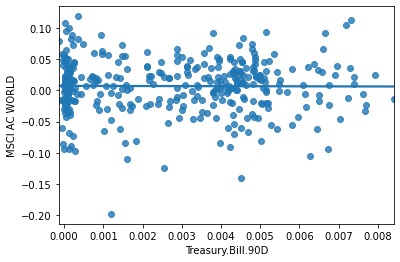

In [43]:
sns.regplot(x='Treasury.Bill.90D', y='MSCI AC WORLD', data=port, ci=None)
plt.show()

 ## **Market Portfolio 2: "MSCI USA"**

In [44]:
# market portfolio 2
portt_assets = ['Date','MSCI USA', 'Treasury.Bill.90D']
portt = indata[portt_assets]
portt = portt.set_index('Date')

mktt = portt['Treasury.Bill.90D']

mscit = portt['MSCI USA']

mktt_sm = sm.add_constant(mktt)

modelt = sm.OLS(mscit, mktt_sm)

resultst = modelt.fit()

# constant is 0.0068
# beta is 0.8337
print(resultst.summary())

                            OLS Regression Results                            
Dep. Variable:               MSCI USA   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7150
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.398
Time:                        21:00:37   Log-Likelihood:                 615.62
No. Observations:                 348   AIC:                            -1227.
Df Residuals:                     346   BIC:                            -1220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0068      0.00

### <span style = 'color: magenta'> From above we know that beta of market portfolio 2 is 0.8337

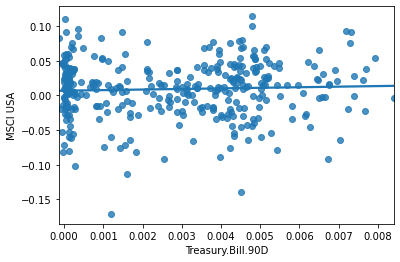

In [45]:
sns.regplot(x='Treasury.Bill.90D', y='MSCI USA', data=portt, ci=None)
plt.show()

## <span style="color:blue"> <u>Version 2</u>

In [46]:
# market portfolio 1
port_1_assets = ['Date','MSCI EUROPE','MSCI AC WORLD']
port_1 = indata[port_1_assets]
port_1 = port_1.set_index('Date')
port_1.head()

mkt1 = port_1['MSCI AC WORLD']

ind1 = port_1['MSCI EUROPE']

# add a constant
mkt1_sm = sm.add_constant(mkt1)

model1 = sm.OLS(ind1, mkt1_sm)

results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            MSCI EUROPE   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1802.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          3.05e-139
Time:                        21:00:37   Log-Likelihood:                 866.96
No. Observations:                 348   AIC:                            -1730.
Df Residuals:                     346   BIC:                            -1722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.001      0.382

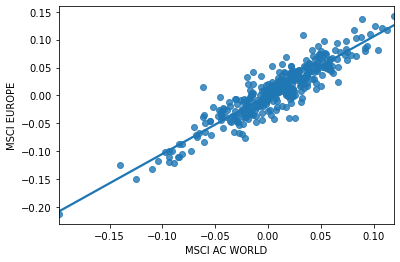

In [47]:
sns.regplot(x='MSCI AC WORLD', y='MSCI EUROPE', data=port_1, ci=None)
plt.show()

In [48]:
# market portfolio 1
port_2_assets = ['Date','MSCI USA','MSCI AC WORLD']
port_2 = indata[port_2_assets]
port_2 = port_2.set_index('Date')
port_2.head()

mkt2 = port_2['MSCI AC WORLD']

ind2 = port_2['MSCI USA']

# add a constant
mkt2_sm = sm.add_constant(mkt2)

model2 = sm.OLS(ind2, mkt2_sm)

results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               MSCI USA   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1300.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          3.31e-119
Time:                        21:00:37   Log-Likelihood:                 886.60
No. Observations:                 348   AIC:                            -1769.
Df Residuals:                     346   BIC:                            -1761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0032      0.001      3.133

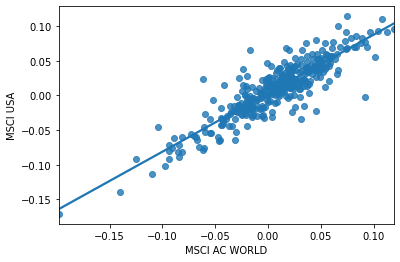

In [49]:
sns.regplot(x='MSCI AC WORLD', y='MSCI USA', data=port_2, ci=None)
plt.show()

In [50]:
# market portfolio 1
port_3_assets = ['Date','MSCI PACIFIC','MSCI AC WORLD']
port_3 = indata[port_3_assets]
port_3 = port_3.set_index('Date')
port_3.head()

mkt3 = port_3['MSCI AC WORLD']

ind3 = port_3['MSCI PACIFIC']

# add a constant
mkt3_sm = sm.add_constant(mkt3)

model3 = sm.OLS(ind3, mkt3_sm)

results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           MSCI PACIFIC   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     647.0
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.25e-81
Time:                        21:00:37   Log-Likelihood:                 693.50
No. Observations:                 348   AIC:                            -1383.
Df Residuals:                     346   BIC:                            -1375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0037      0.002     -2.045

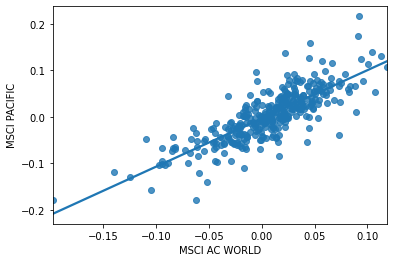

In [51]:
sns.regplot(x='MSCI AC WORLD', y='MSCI PACIFIC', data=port_3, ci=None)
plt.show()

In [52]:
# market portfolio 1
port_4_assets = ['Date','Treasury.Bond.10Y','MSCI AC WORLD']
port_4 = indata[port_4_assets]
port_4 = port_4.set_index('Date')
port_4.head()

mkt4 = port_4['MSCI AC WORLD']

ind4 = port_4['Treasury.Bond.10Y']

# add a constant
mkt4_sm = sm.add_constant(mkt4)

model4 = sm.OLS(ind4, mkt4_sm)

results4 = model4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:      Treasury.Bond.10Y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.649
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.105
Time:                        21:00:38   Log-Likelihood:                 871.40
No. Observations:                 348   AIC:                            -1739.
Df Residuals:                     346   BIC:                            -1731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0059      0.001      5.483

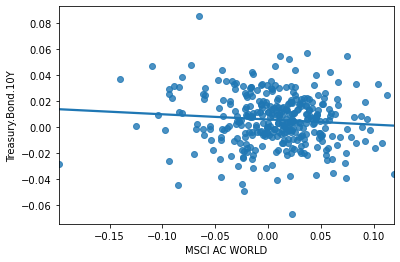

In [53]:
sns.regplot(x='MSCI AC WORLD', y='Treasury.Bond.10Y', data=port_4, ci=None)
plt.show()

### <span style = 'color: red'> From the calculations above, <br><br> beta of MSCI EUROPE to MSCI AC WORLD is 1.0525, <br><br> beta of MSCI USA to MSCI AC WORLD is 0.8447, <br><br> beta of MSCI PACIFIC to MSCI AC WORLD is 1.0381, <br><br> beta of Treasury.Bond.10Y to MSCI AC WORLD is -0.0398 

We can observe that the betas of MSCI EUROPE and MSCI PACIFIC to MSCI AC WORLD are both larger than 1, meaning that the two assets move in the same dirction as the market and are about 5% and 4% more volatile than the market respectively. They are riskier but also provide higher return potential.<br><br> The beta of MSCI USA to MSCI AC WORLD is 0.8447, between 0 and 1, which means this asset poses less risk but also lower returns. <br><br> The beta of Treasury.Bond.10Y to MSCI AC WORLD is negative. This means the asset moves in opposite direction from the market. When the market rises, an investment of Treasury.Bond.10Y will fall. So if we invest in this asset, we may loss when the market rises but gain when the market falls. <br><br> In conclusion, for a risk-averse person, he/she should invest in MSCI USA and Treasury.Bond.10Y (in case of the market falls). While for a risk-taking person, he/she should invest in MSCI EUROPE and MSCI PACIFIC, which will give them high return when the market rises.

 ## **Market Portfolio 2: "MSCI USA"**

In [54]:
# market portfolio 1
port_5_assets = ['Date','MSCI EUROPE','MSCI USA']
port_5 = indata[port_5_assets]
port_5 = port_5.set_index('Date')
port_5.head()

mkt5 = port_5['MSCI USA']

ind5 = port_5['MSCI EUROPE']

# add a constant
mkt5_sm = sm.add_constant(mkt5)

model5 = sm.OLS(ind5, mkt5_sm)

results5 = model5.fit()

print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:            MSCI EUROPE   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     543.7
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.97e-73
Time:                        21:00:38   Log-Likelihood:                 713.59
No. Observations:                 348   AIC:                            -1423.
Df Residuals:                     346   BIC:                            -1415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.498      0.6

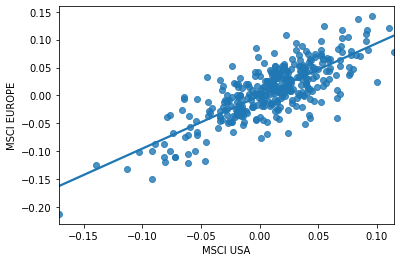

In [55]:
sns.regplot(x='MSCI USA', y='MSCI EUROPE', data=port_5, ci=None)
plt.show()

In [56]:
# market portfolio 1
port_6_assets = ['Date','MSCI USA']
port_6 = indata[port_6_assets]
port_6 = port_6.set_index('Date')


mkt6 = port_6['MSCI USA']

ind6 = port_6['MSCI USA']

# add a constant
mkt6_sm = sm.add_constant(mkt6)

model6 = sm.OLS(ind6, mkt6_sm)

results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:               MSCI USA   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.673e+33
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:00:38   Log-Likelihood:                 12909.
No. Observations:                 348   AIC:                        -2.581e+04
Df Residuals:                     346   BIC:                        -2.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0   1.03e-18          0      1.0

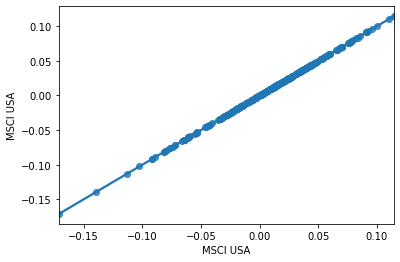

In [57]:
sns.regplot(x='MSCI USA', y='MSCI USA', data=port_6, ci=None)
plt.show()

In [58]:
# market portfolio 1
port_7_assets = ['Date','MSCI PACIFIC','MSCI USA']
port_7 = indata[port_7_assets]
port_7 = port_7.set_index('Date')

mkt7 = port_7['MSCI USA']

ind7 = port_7['MSCI PACIFIC']

# add a constant
mkt7_sm = sm.add_constant(mkt7)

model7 = sm.OLS(ind7, mkt7_sm)

results7 = model7.fit()

print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:           MSCI PACIFIC   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.39e-27
Time:                        21:00:38   Log-Likelihood:                 569.70
No. Observations:                 348   AIC:                            -1135.
Df Residuals:                     346   BIC:                            -1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.003     -1.183      0.2

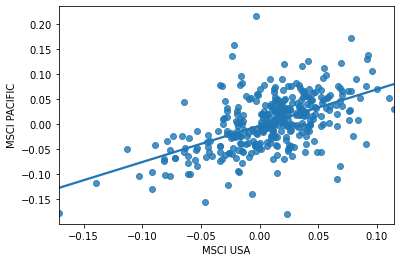

In [59]:
sns.regplot(x='MSCI USA', y='MSCI PACIFIC', data=port_7, ci=None)
plt.show()

In [60]:
# market portfolio 1
port_8_assets = ['Date','Treasury.Bond.10Y','MSCI USA']
port_8 = indata[port_8_assets]
port_8 = port_8.set_index('Date')

mkt8 = port_8['MSCI USA']

ind8 = port_8['Treasury.Bond.10Y']

# add a constant
mkt8_sm = sm.add_constant(mkt8)

model8 = sm.OLS(ind8, mkt8_sm)

results8 = model8.fit()

print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:      Treasury.Bond.10Y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7788
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.378
Time:                        21:00:38   Log-Likelihood:                 870.46
No. Observations:                 348   AIC:                            -1737.
Df Residuals:                     346   BIC:                            -1729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.001      5.343      0.0

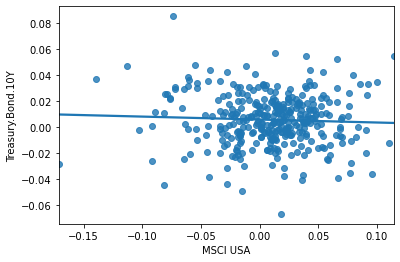

In [61]:
sns.regplot(x='MSCI USA', y='Treasury.Bond.10Y', data=port_8, ci=None)
plt.show()

### <span style = 'color: red'> From the calculations above, <br><br> beta of MSCI EUROPE to MSCI USA is 0.9450, <br><br> beta of MSCI USA to MSCI USA is 1.0000, <br><br> beta of MSCI PACIFIC to MSCI USA is 0.7289, <br><br> beta of Treasury.Bond.10Y to MSCI USA is -0.0228 

The beta of an asset to itself is 1. <br><br> We can observe that the betas of MSCI EUROPE and MSCI PACIFIC to MSCI USA are between 0 and 1, meaning that the two assets move in the same direction as the market and are less volatile than the market. This means that adding these two assets in will make our portfolio less risky. <br><br> The beta of Treasury.Bond.10Y to MSCI USA is negative, meaning that the asset moves in opposite direction from the market. When the market rises, an investment of Treasury.Bond.10Y will fall. So if we invest in this asset, we may loss when the market rises but gain when the market falls.<br><br> In conclusion, MSCI EUROPE and MSCI PACIFIC are good choices when considering investing in the market.